In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import re
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("review_data.csv")
df.head(20)

,score,review,y
0,5.0,명불허전,1
1,5.0,"이거슨 한국의 까르보나라,,,🤍 들깨칼국수 고소하니 넘 맛나유 얼큰해물칼국수는 해물...",1
2,5.0,들깨가 찐하고 고소해요. 음식맛이 깔끔해요. 어르신 모시고 청주 온다면 식사하기 괜...,1
3,4.0,청주 사람들 점심엔 여기만 오나봐요. 주말 점심시간에 왔는데 손님 100명은 앉아있...,1
4,5.0,NaN,1
5,5.0,NaN,1
6,5.0,4명에서 3~4인 셋트시키면 진짜 배터지게 먹고나올수있어요!,1
7,5.0,들깨칼국수 땡기면 찾아가는곳,1
8,5.0,일하시는분들이 친절하고 음식이 들깨칼국수 맛있어요,1
9,3.0,NaN,0


In [3]:
def text_cleaning(text):
    # 정규표현식으로 한글만 추출
        hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
        result = hangul.sub('', text)
        return result

In [4]:
df = pd.read_csv("review_data.csv")
row = []
for i in df['review']:
    row.append(text_cleaning(str(i)))

df['ko_text'] = row
del df['review']

# 한 글자 이상의 텍스트를 가지고 있는 데이터만 추출
df = df[df['ko_text'].str.len() > 0]
df.tail(5)

,score,y,ko_text
456,5.0,1,새우튀김 우동 처음 먹어봤는데 진짜 맛있어요충대 주변 돈까스집 다 먹어봤는데 양이나...
457,5.0,1,점심식사로 추천합니다 진짜 일식 돈까스중에서는최곱니다
458,5.0,1,충북대학교 맛집양꼬치 맛집이내요 몸에좋고 보양식이예요
459,5.0,1,맛있게 잘 먹었습니다
460,5.0,1,세트 먹었는데 푸짐하고 넘 맛있어요 명이서 먹을 양


In [5]:
from konlpy.tag import Okt

# konlpy라이브러리로 텍스트 데이터에서 형태소를 추출합니다.
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 동작을 테스트합니다.
result = get_pos(df['ko_text'].values[0])
print(result)

['명불허전/Noun']


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())

In [7]:
X.shape

(358, 2871)

In [8]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'명불허전/Noun': 998, '이거슨/Noun': 1988, '한국/Noun': 2743, '의/Josa': 1980, '까르보나라/Noun': 353, '들깨/Noun': ..


In [26]:
print(df['ko_text'].values[1])
print(X[1])

이거슨 한국의 까르보나라 들깨칼국수 고소하니 넘 맛나유 얼큰해물칼국수는 해물도 많이 들어있고 약간 짬뽕 느낌 해물파전도 괜춘스 가족들과 외식하기 좋숩니다
  (0, 1927)	1
  (0, 2665)	1
  (0, 1922)	1
  (0, 343)	1
  (0, 686)	1
  (0, 2464)	2
  (0, 193)	1
  (0, 466)	1
  (0, 859)	1
  (0, 428)	1
  (0, 1707)	1
  (0, 1025)	1
  (0, 500)	1
  (0, 2700)	1
  (0, 612)	2
  (0, 850)	1
  (0, 701)	1
  (0, 1669)	1
  (0, 2320)	1
  (0, 499)	1
  (0, 2701)	1
  (0, 232)	1
  (0, 69)	1
  (0, 685)	1
  (0, 217)	1
  (0, 1858)	1
  (0, 2614)	1
  (0, 2202)	1
  (0, 511)	1


In [9]:
print(df['ko_text'].values[0])
print(X[0])

명불허전
  (0, 998)	1


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

print(X.shape)
print(X[0])

(358, 2871)
  (0, 998)	1.0


In [11]:
from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)

(286, 2871)
(72, 2871)


In [12]:
import pickle
with open('맛집리뷰분석_충남대.model', 'rb') as f:
  loaded_model = pickle.load(f)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

accuracy: 0.74
Precision: 0.736
Recall: 1.000
F1: 0.848


AUC: 0.788


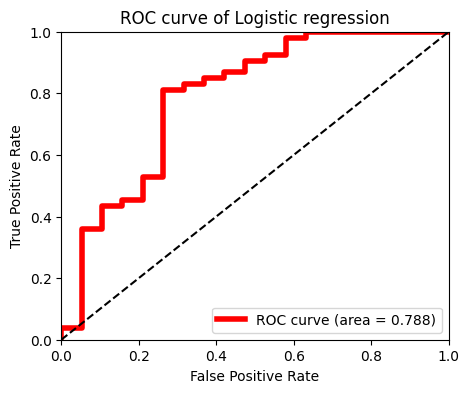

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC: %.3f" % roc_auc)

plt.rcParams['figure.figsize']=[5,4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

[(1.5780670779086743, 911), (0.976257462580082, 2273), (0.815134603204007, 2477), (0.61950926648821, 2245), (0.5851821711848181, 898)]
[(-0.6784009955085346, 1254), (-0.8503066138287007, 1973), (-0.8531965642716665, 278), (-0.8576986054419249, 1183), (-1.1429585702784573, 1985)]


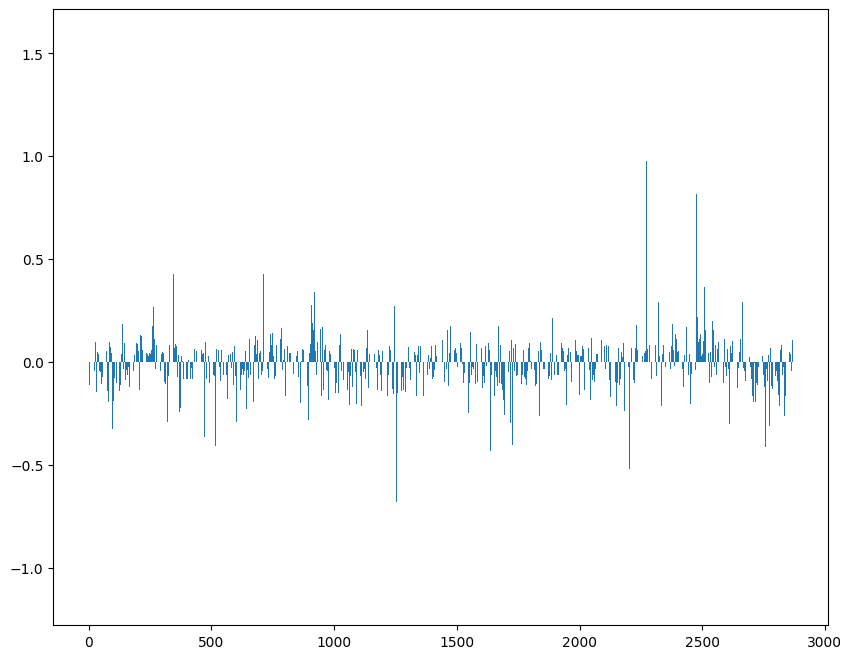

In [16]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
print(sorted(((value, index)for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index)for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

In [17]:
# 회귀모델의 계수를 기준으로 내림차순 정렬
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)

In [18]:
# 회귀 모델의 계수를 index_vectorizer에 맵핑하여, 어떤 형태소인지 출력
invert_index_vectorizer = {v:k for k, v in index_vectorizer.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'..')

{998: '명불허전/Noun', 1988: '이거슨/Noun', 2743: '한국/Noun', 1980: '의/Josa', 353: '까르보나라/Noun', 712: '들깨/No..


In [19]:
# 계수가 높은 순으로 피처에 형태소 맵핑한 결과 출력, 이때 계수가 높은 피쳐는 리뷰에 긍정적인 영향을 주는 형태소라고 할 수 있다.
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])

맛있어요/Adjective 1.5780670779086743
좋아요/Adjective 0.976257462580082
최고/Noun 0.815134603204007
존맛/Noun 0.61950926648821
맛있게/Adjective 0.5851821711848181
먹었습니다/Verb 0.5720251484775519
대/Modifier 0.5590609975402624
칼국수/Noun 0.558994757425988
청주/Noun 0.5047784468122742
좋은/Adjective 0.5029195351589942


In [20]:
# 하위 10개 부정 형태소 출력
for coef in coef_pos_index[-10:]:
    print(invert_index_vectorizer[coef[1]], coef[0])

손님/Noun -0.5775350788945912
임/Noun -0.579157327892668
요/Josa -0.5934781987405251
가/Josa -0.6052144663523074
말/Noun -0.6109133108832577
불친절/Noun -0.6784009955085346
은/Josa -0.8503066138287007
그냥/Noun -0.8531965642716665
별로/Noun -0.8576986054419249
이/Josa -1.1429585702784573


In [21]:
#긍정
pos_key = []
pos_value = []
for coef in coef_pos_index[:50]:   #20단어 뽑기
    pos_key.append(invert_index_vectorizer[coef[1]])
    pos_value.append(coef[0])
pos_wc = dict(zip(pos_key, pos_value))  #딕셔너리로 변환
pos_wc

{'맛있어요/Adjective': 1.5780670779086743,
 '좋아요/Adjective': 0.976257462580082,
 '최고/Noun': 0.815134603204007,
 '존맛/Noun': 0.61950926648821,
 '맛있게/Adjective': 0.5851821711848181,
 '먹었습니다/Verb': 0.5720251484775519,
 '대/Modifier': 0.5590609975402624,
 '칼국수/Noun': 0.558994757425988,
 '청주/Noun': 0.5047784468122742,
 '좋은/Adjective': 0.5029195351589942,
 '맛있고/Adjective': 0.4935631635600228,
 '좋고/Adjective': 0.4702268452131898,
 '굿/Noun': 0.45197188730188104,
 '들깨/Noun': 0.42984871755350956,
 '김밥/Noun': 0.4295190867925957,
 '맛있음/Adjective': 0.4210760747191646,
 '비/Noun': 0.41723592638498364,
 '친절하고/Adjective': 0.365849769054649,
 '완전/Noun': 0.3639936022410821,
 '가성/Noun': 0.3427778795602382,
 '맛집/Noun': 0.3421507141606457,
 '많아요/Adjective': 0.34200633605384567,
 '맛있는데/Adjective': 0.34104039042953926,
 '자주/Noun': 0.3232169901715034,
 '친절하시고/Adjective': 0.3127722944314501,
 '진짜/Noun': 0.3031144524094268,
 '근처/Noun': 0.29948248025158375,
 'ㄱㅊ/KoreanParticle': 0.29842628241407276,
 '주차/Noun': 0.29308

In [22]:
#부정
neg_key = []
neg_value = []
for coef in coef_pos_index[-50:]:   #20단어 뽑기
    neg_key.append(invert_index_vectorizer[coef[1]])
    neg_value.append(coef[0])
for v in range(len(neg_value)):     #절댓값 처리(음수를 양수로)
    neg_value[v] = abs(neg_value[v])
neg_wc = dict(zip(neg_key, neg_value))  #딕셔너리로 변환
neg_wc

{'튀김/Noun': 0.3024837720360106,
 '아님/Adjective': 0.30772006496572135,
 'ㅠㅠ/KoreanParticle': 0.3095616379611521,
 '해/Verb': 0.3119894689821505,
 '산/Noun': 0.313284499924909,
 '안감/Noun': 0.3140215275846531,
 '없고/Adjective': 0.31560303834571235,
 '평범/Noun': 0.31763664388396573,
 '기대했던거보다/Adjective': 0.31763664388396573,
 '고/Josa': 0.3203234283846555,
 '값/Noun': 0.3244402723079593,
 '비는/Verb': 0.3508549581421904,
 '준비/Noun': 0.35579516881593587,
 '김치/Noun': 0.35700237821661557,
 '곳/Noun': 0.3595210250168581,
 '냄새/Noun': 0.36179356807865837,
 '심각합니다/Adjective': 0.36223045078915705,
 '으로/Josa': 0.37825717519962215,
 '맛없어요/Adjective': 0.3788477300904027,
 '안/Noun': 0.38890051409547566,
 '주문/Noun': 0.39459130884387816,
 '더러워요/Adjective': 0.39553987169789123,
 '싸가지/Noun': 0.3972456377410221,
 '이하/Noun': 0.40308081196489504,
 '어/Suffix': 0.4031296196462466,
 '느낌/Noun': 0.40878505231129564,
 '인/Josa': 0.4108286575912278,
 '한테/Josa': 0.41324726230055925,
 'ㅜㅜ/KoreanParticle': 0.4163715586360351,
 

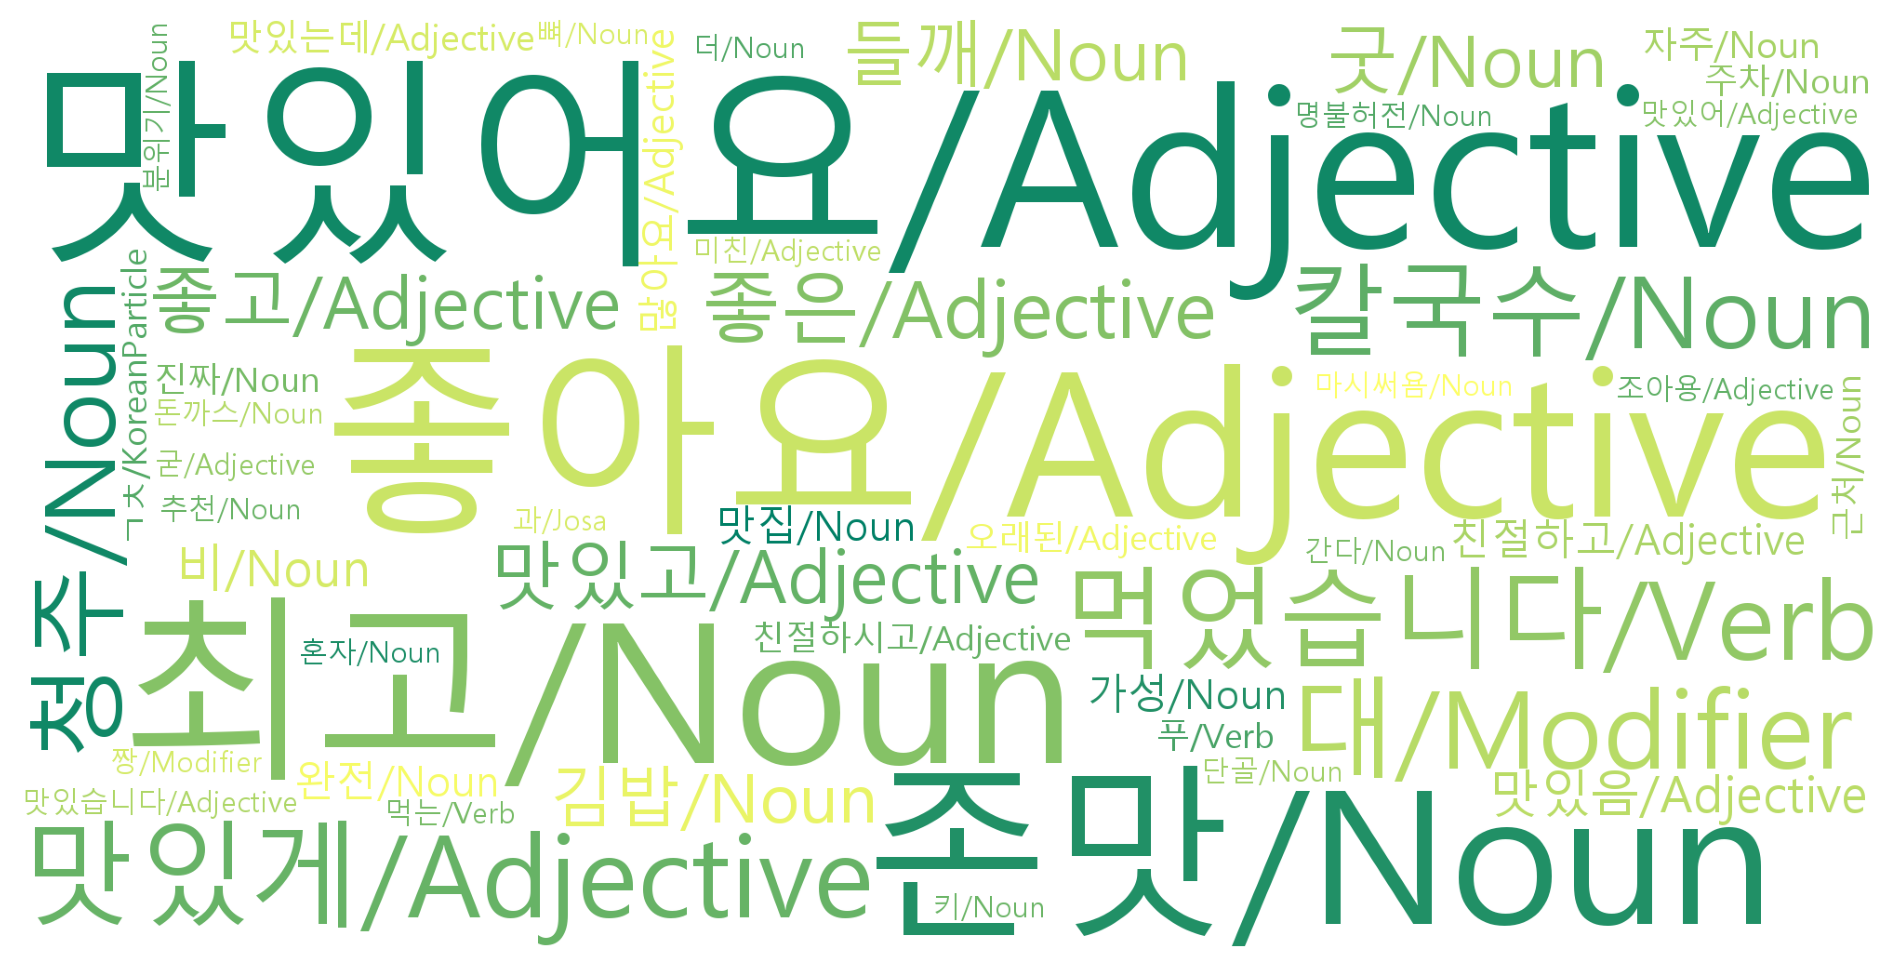

In [23]:
from wordcloud import WordCloud
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
wordcloud = WordCloud(font_path= "c:/Windows/fonts/malgun.ttf", 
                      relative_scaling = 0.2,
                      max_font_size = 600, 
                      background_color='white',
                      colormap = 'summer',
                      width=2000, height=1000).generate_from_frequencies(pos_wc)

plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

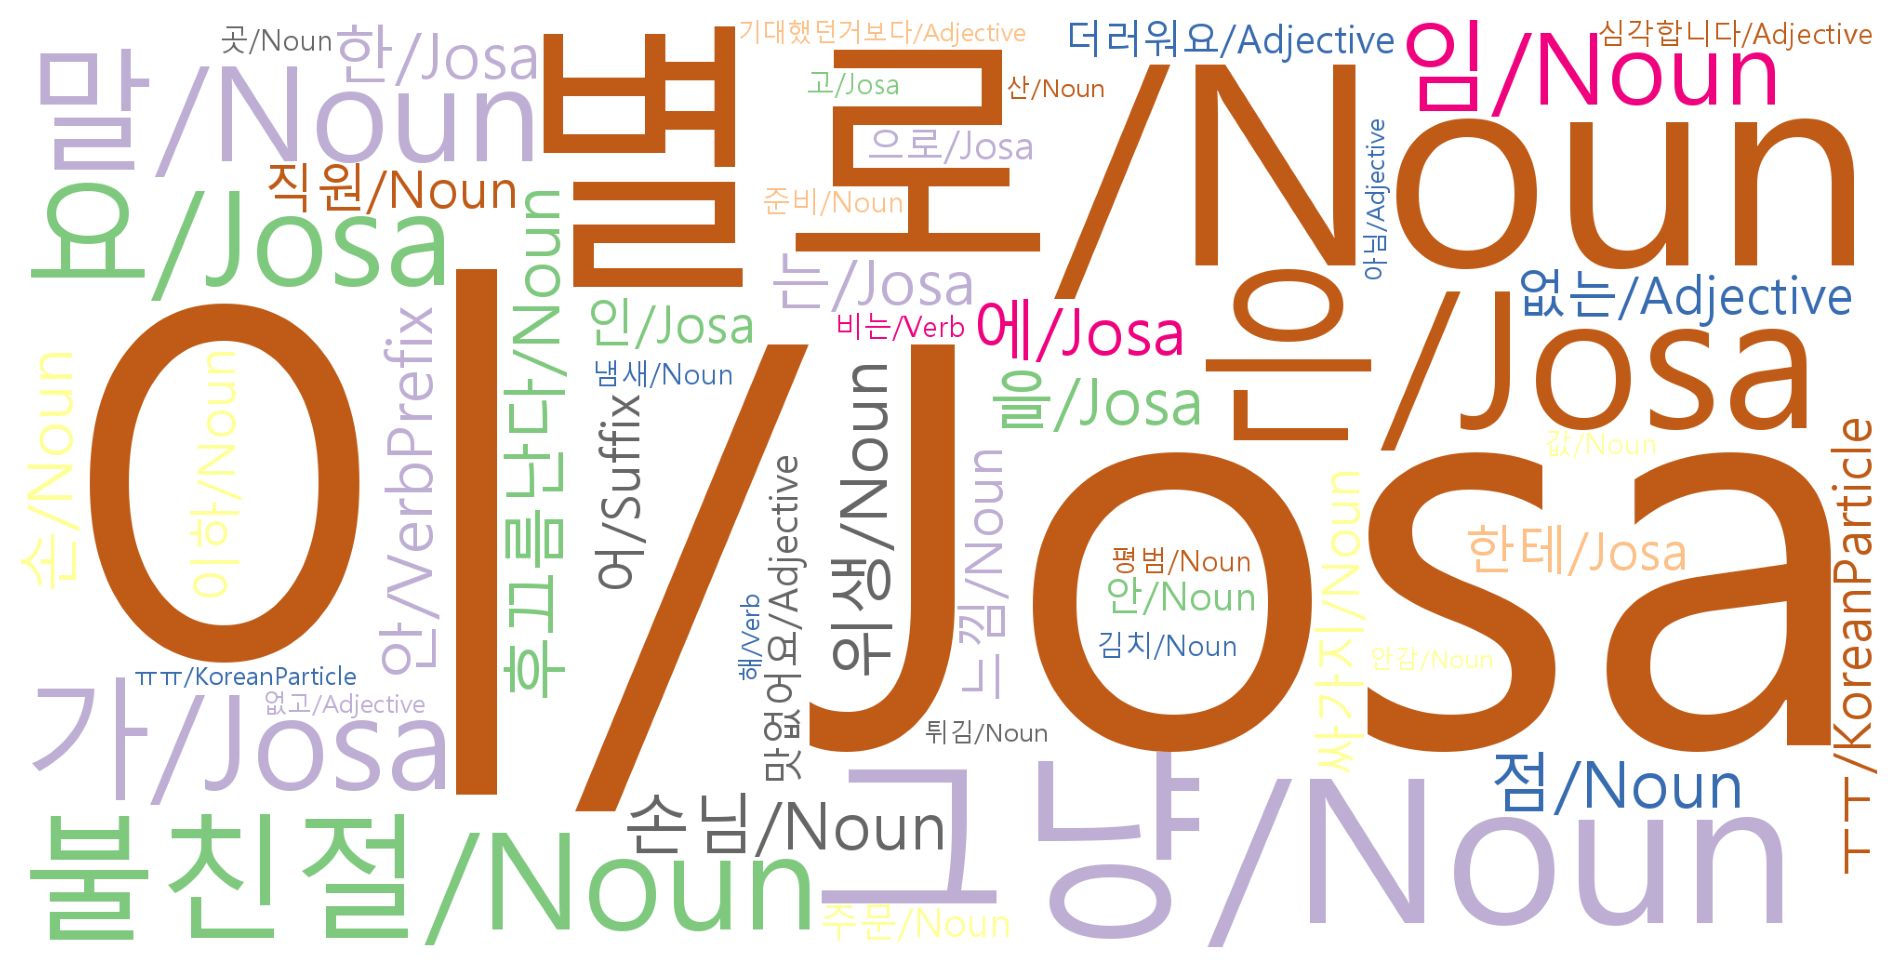

In [29]:
wordcloud = WordCloud(font_path = 'c:/Windows/fonts/malgun.ttf', 
                      relative_scaling = 0.2,
                      max_font_size = 600,
                      background_color='white',
                      colormap = "Accent_r", 
                      width=2000, height=1000).generate_from_frequencies(neg_wc) 

plt.figure(figsize = (12,8))                
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [30]:
# 보기좋은 워드클라우드 가시화를 위한 코드

In [31]:
df['y'].value_counts()

y
1    241
0    117
Name: count, dtype: int64

In [32]:
from konlpy.tag import Okt

# konlpy라이브러리로 텍스트 데이터에서 형태소를 추출합니다.
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}'.format(word[0]) for word in pos]
    return pos

# 형태소 추출 동작을 테스트합니다.
result = get_pos(df['ko_text'].values[0])
print(result)

['명불허전']


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())

In [34]:
X.shape

(358, 2792)

In [35]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'명불허전': 968, '이거슨': 1927, '한국': 2665, '의': 1922, '까르보나라': 343, '들깨': 686, '칼국수': 2464, '고소하니': 193,..


In [36]:
print(df['ko_text'].values[0])
print(X[0])

명불허전
  (0, 968)	1


In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

print(X.shape)
print(X[0])

(358, 2792)
  (0, 968)	1.0


In [38]:
from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)

(250, 2792)
(108, 2792)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

accuracy: 0.70
Precision: 0.704
Recall: 1.000
F1: 0.826


In [42]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)

In [43]:
invert_index_vectorizer = {v:k for k, v in index_vectorizer.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'..')

{968: '명불허전', 1927: '이거슨', 2665: '한국', 1922: '의', 343: '까르보나라', 686: '들깨', 2464: '칼국수', 193: '고소하니',..


In [44]:
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])

맛있어요 1.3341435505157742
좋아요 0.9002955864491156
최고 0.7801584535431666
맛있게 0.6253601410615288
먹었습니다 0.6112997715196699
김밥 0.5798858781873328
맛있음 0.536571053581752
존맛 0.5272722336918567
ㅎㅎ 0.44760488853151126
맛있고 0.4396762348612437


In [45]:
for coef in coef_pos_index[-10:]:
    print(invert_index_vectorizer[coef[1]], coef[0])

안 -0.5107932411434515
후끄름난다 -0.5525850154467971
임 -0.5843476286644854
에 -0.6084608176347353
이 -0.665329374487707
가 -0.6729190164835548
불친절 -0.6858759421350422
그냥 -0.7354780931036402
별로 -0.8821292807620642
은 -1.0326193845004858


In [46]:
#긍정
pos_key = []
pos_value = []
for coef in coef_pos_index[:50]:   #50단어 뽑기
    pos_key.append(invert_index_vectorizer[coef[1]])
    pos_value.append(coef[0])
pos_wc = dict(zip(pos_key, pos_value))  #딕셔너리로 변환
pos_wc

{'맛있어요': 1.3341435505157742,
 '좋아요': 0.9002955864491156,
 '최고': 0.7801584535431666,
 '맛있게': 0.6253601410615288,
 '먹었습니다': 0.6112997715196699,
 '김밥': 0.5798858781873328,
 '맛있음': 0.536571053581752,
 '존맛': 0.5272722336918567,
 'ㅎㅎ': 0.44760488853151126,
 '맛있고': 0.4396762348612437,
 '대': 0.4388245173260959,
 '좋고': 0.4259300012499304,
 '친절하시고': 0.4119020065462352,
 '진짜': 0.4070323849806447,
 '나': 0.4068880265082871,
 '자주': 0.3916904259998492,
 '맛집': 0.35419062740372015,
 '친절하고': 0.338809933936915,
 '좋음': 0.3377969407029367,
 '먹고': 0.33586898455453373,
 '볶음밥': 0.32669700202483876,
 '키': 0.312725733569119,
 'ㄱㅊ': 0.3060258858122429,
 '먹는': 0.29516250206140393,
 '청주': 0.28989278433316507,
 '맛있습니다': 0.28898416639946983,
 '미친': 0.28711063542180404,
 '방문': 0.284760650978167,
 '빵': 0.28171021518715333,
 '커피': 0.2808695222235411,
 '굿': 0.27626572181219244,
 '추천': 0.2734167578794368,
 '많아요': 0.2659640570334781,
 '랑': 0.2648749654228715,
 '퍼풱투': 0.2635935378897972,
 '조아요': 0.2635935378897972,
 '명불허전'

In [47]:
#부정
neg_key = []
neg_value = []
for coef in coef_pos_index[-50:]:   #50단어 뽑기
    neg_key.append(invert_index_vectorizer[coef[1]])
    neg_value.append(coef[0])
for v in range(len(neg_value)):     #절댓값 처리(음수를 양수로)
    neg_value[v] = abs(neg_value[v])
neg_wc = dict(zip(neg_key, neg_value))  #딕셔너리로 변환
neg_wc

{'양': 0.29857902471307485,
 '있는': 0.29859393761294,
 '급식': 0.3006696688105809,
 '곳': 0.30207832363223724,
 '앤쿡': 0.30209233704094846,
 '서가': 0.30209233704094846,
 '아님': 0.30442494308029977,
 '건지': 0.3079000866354929,
 '알바': 0.3145042809655462,
 '싸가지': 0.3174118241713601,
 '주인': 0.31830582719492523,
 '평범': 0.3188423579994831,
 '기대했던거보다': 0.3188423579994831,
 '산': 0.3228768197339597,
 '에서': 0.3268551957170709,
 '먹을만한': 0.33085356471637034,
 '나름': 0.33085356471637034,
 '이라고': 0.3391852153558881,
 '한': 0.34153515046653704,
 '비는': 0.34872719489110954,
 '인': 0.3509492148298753,
 '엇': 0.3546772257985703,
 '위생': 0.3636155234727613,
 '없고': 0.36510127845937124,
 '주문': 0.36903514175056795,
 '심각합니다': 0.37082112802511935,
 '한테': 0.38256171422505986,
 '손님': 0.3873490584289053,
 '체인점': 0.3921009677426703,
 '직원': 0.3921300826451958,
 '타임': 0.3946849235748381,
 '알바생': 0.39600129882950963,
 '느낌': 0.39968842878280353,
 '옛날': 0.40563191091144934,
 '브레이크': 0.40700736017446415,
 '이하': 0.4086320448740748,
 '

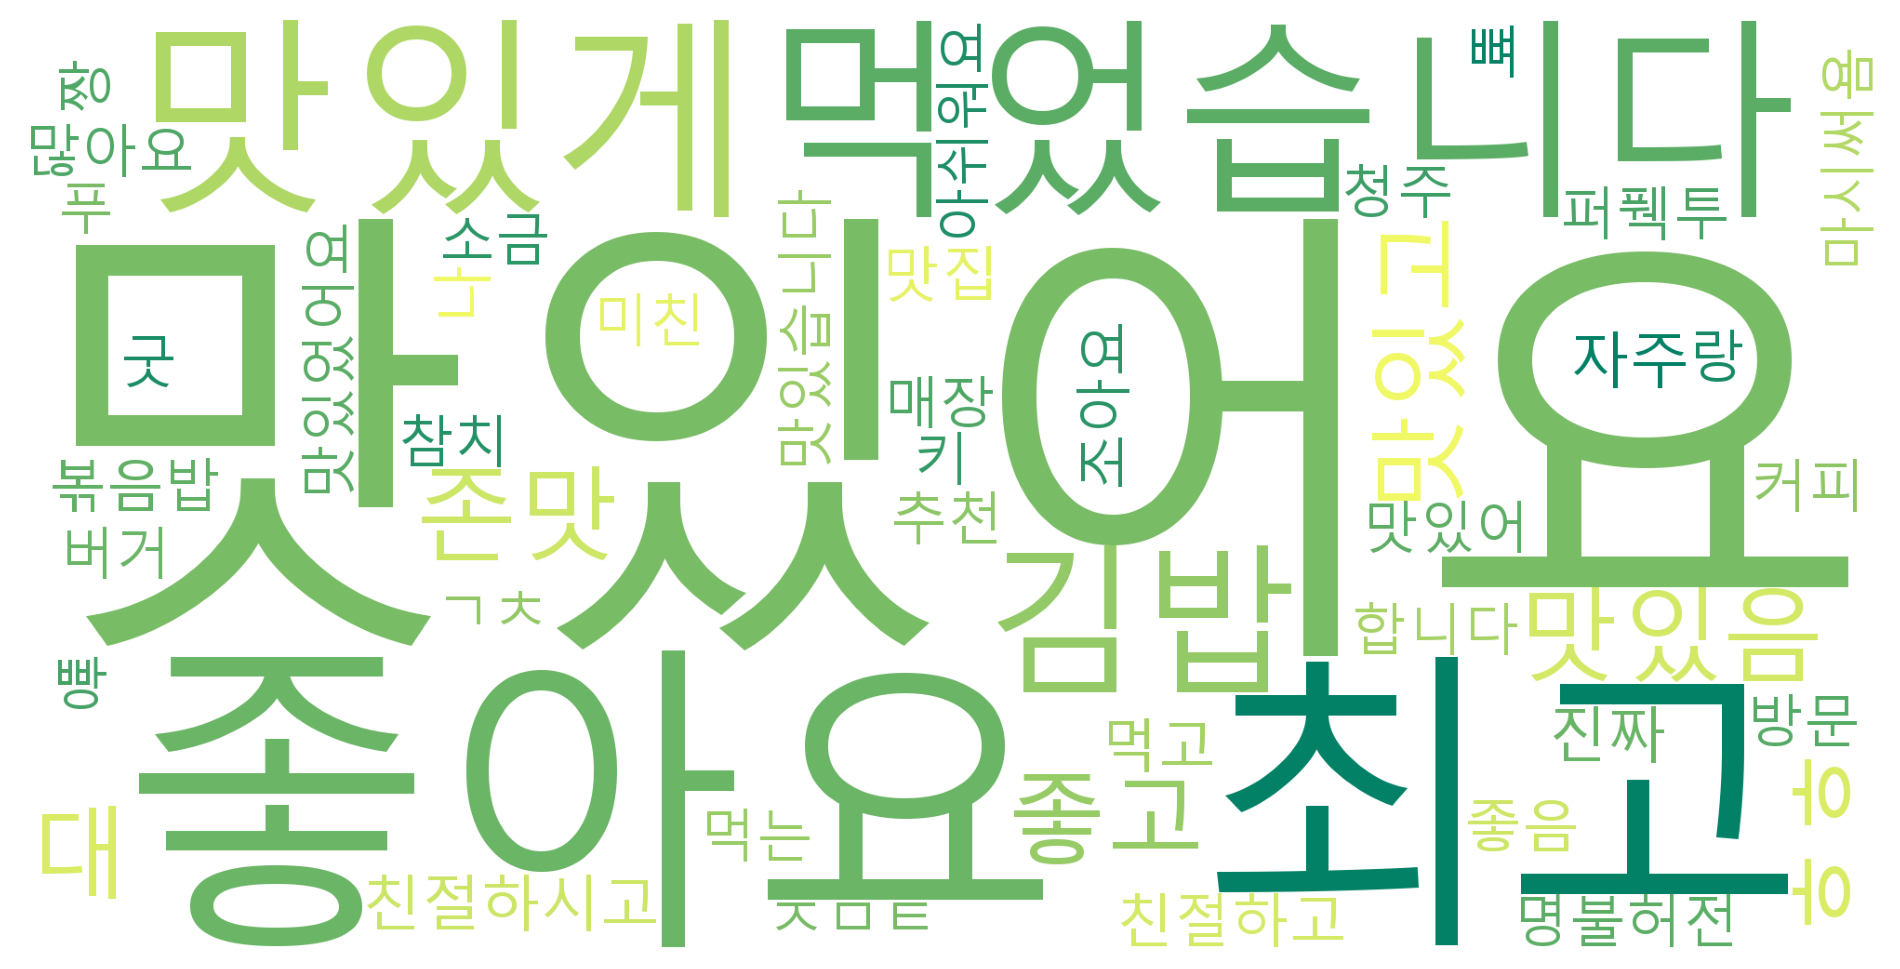

In [48]:
from wordcloud import WordCloud
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
wordcloud = WordCloud(font_path= "c:/Windows/fonts/malgun.ttf", 
                      relative_scaling = 0.2,
                      max_font_size = 600, 
                      background_color='white',
                      colormap = 'summer',
                      width=2000, height=1000).generate_from_frequencies(pos_wc)

plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

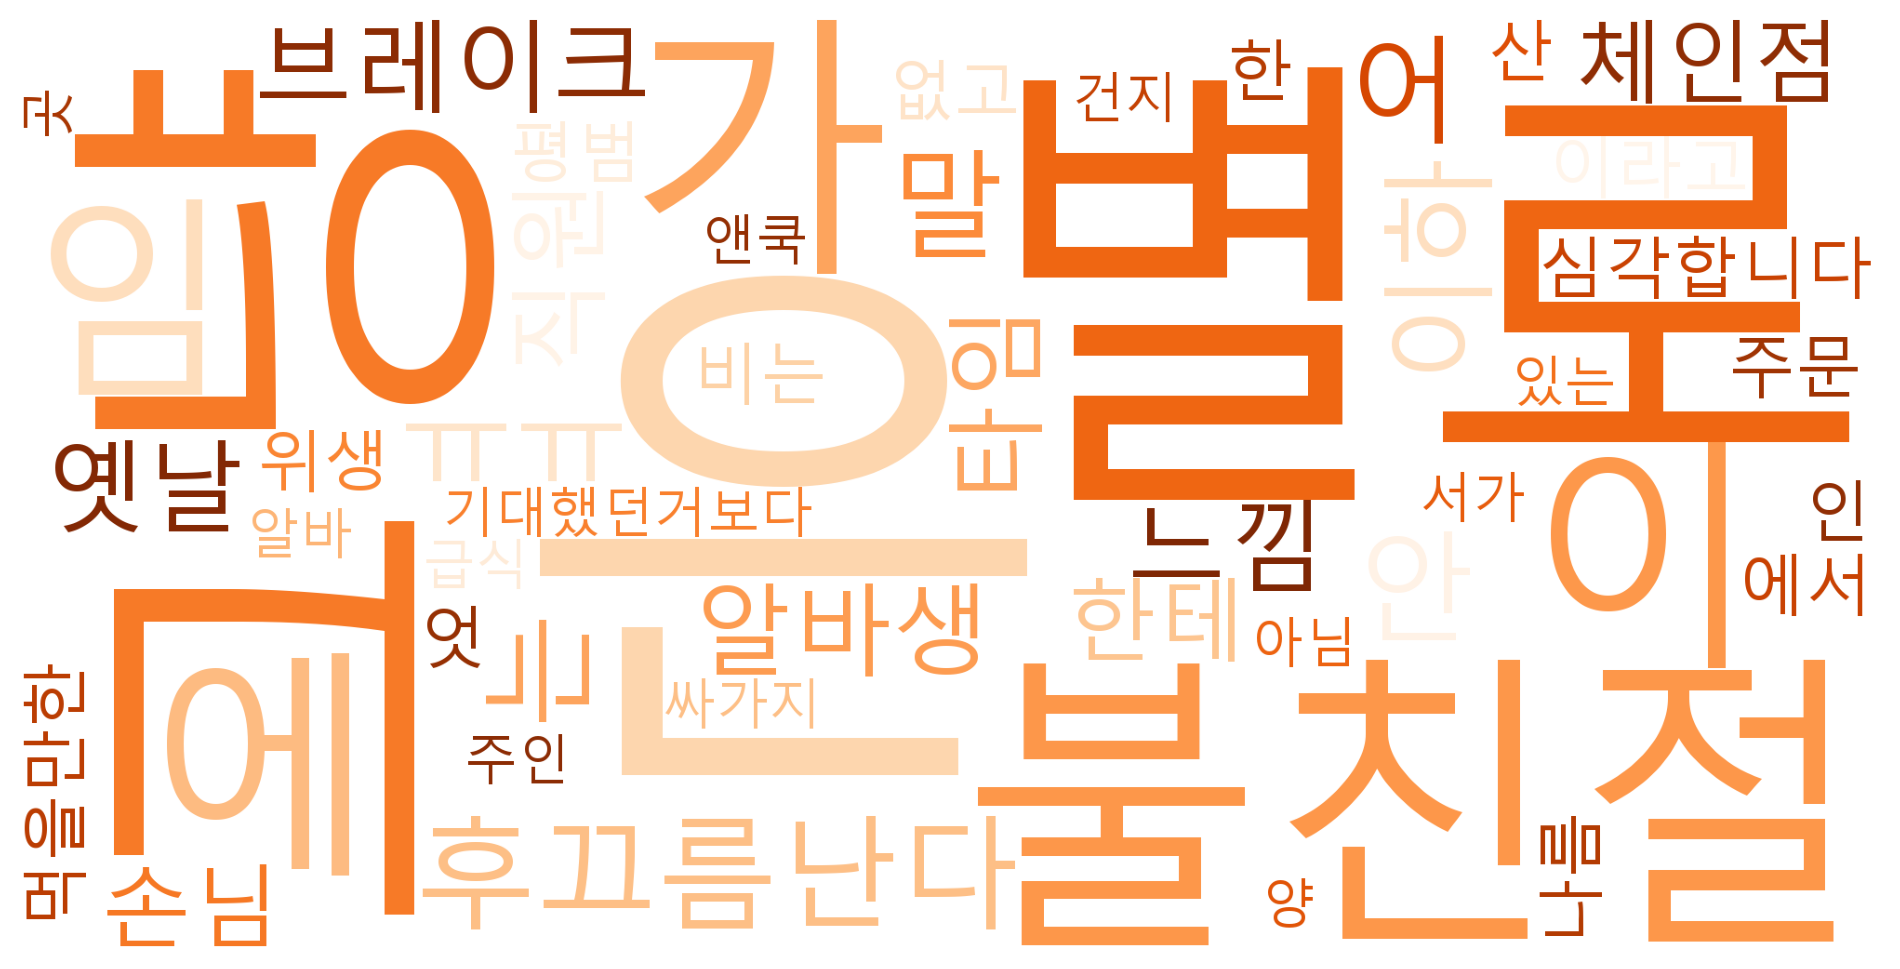

In [51]:
wordcloud = WordCloud(font_path = 'c:/Windows/fonts/malgun.ttf', 
                      relative_scaling = 0.2,
                      max_font_size = 600,
                      background_color='white',
                      colormap = 'Oranges_r', 
                      width=2000, height=1000).generate_from_frequencies(neg_wc) 

plt.figure(figsize = (12,8))                
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

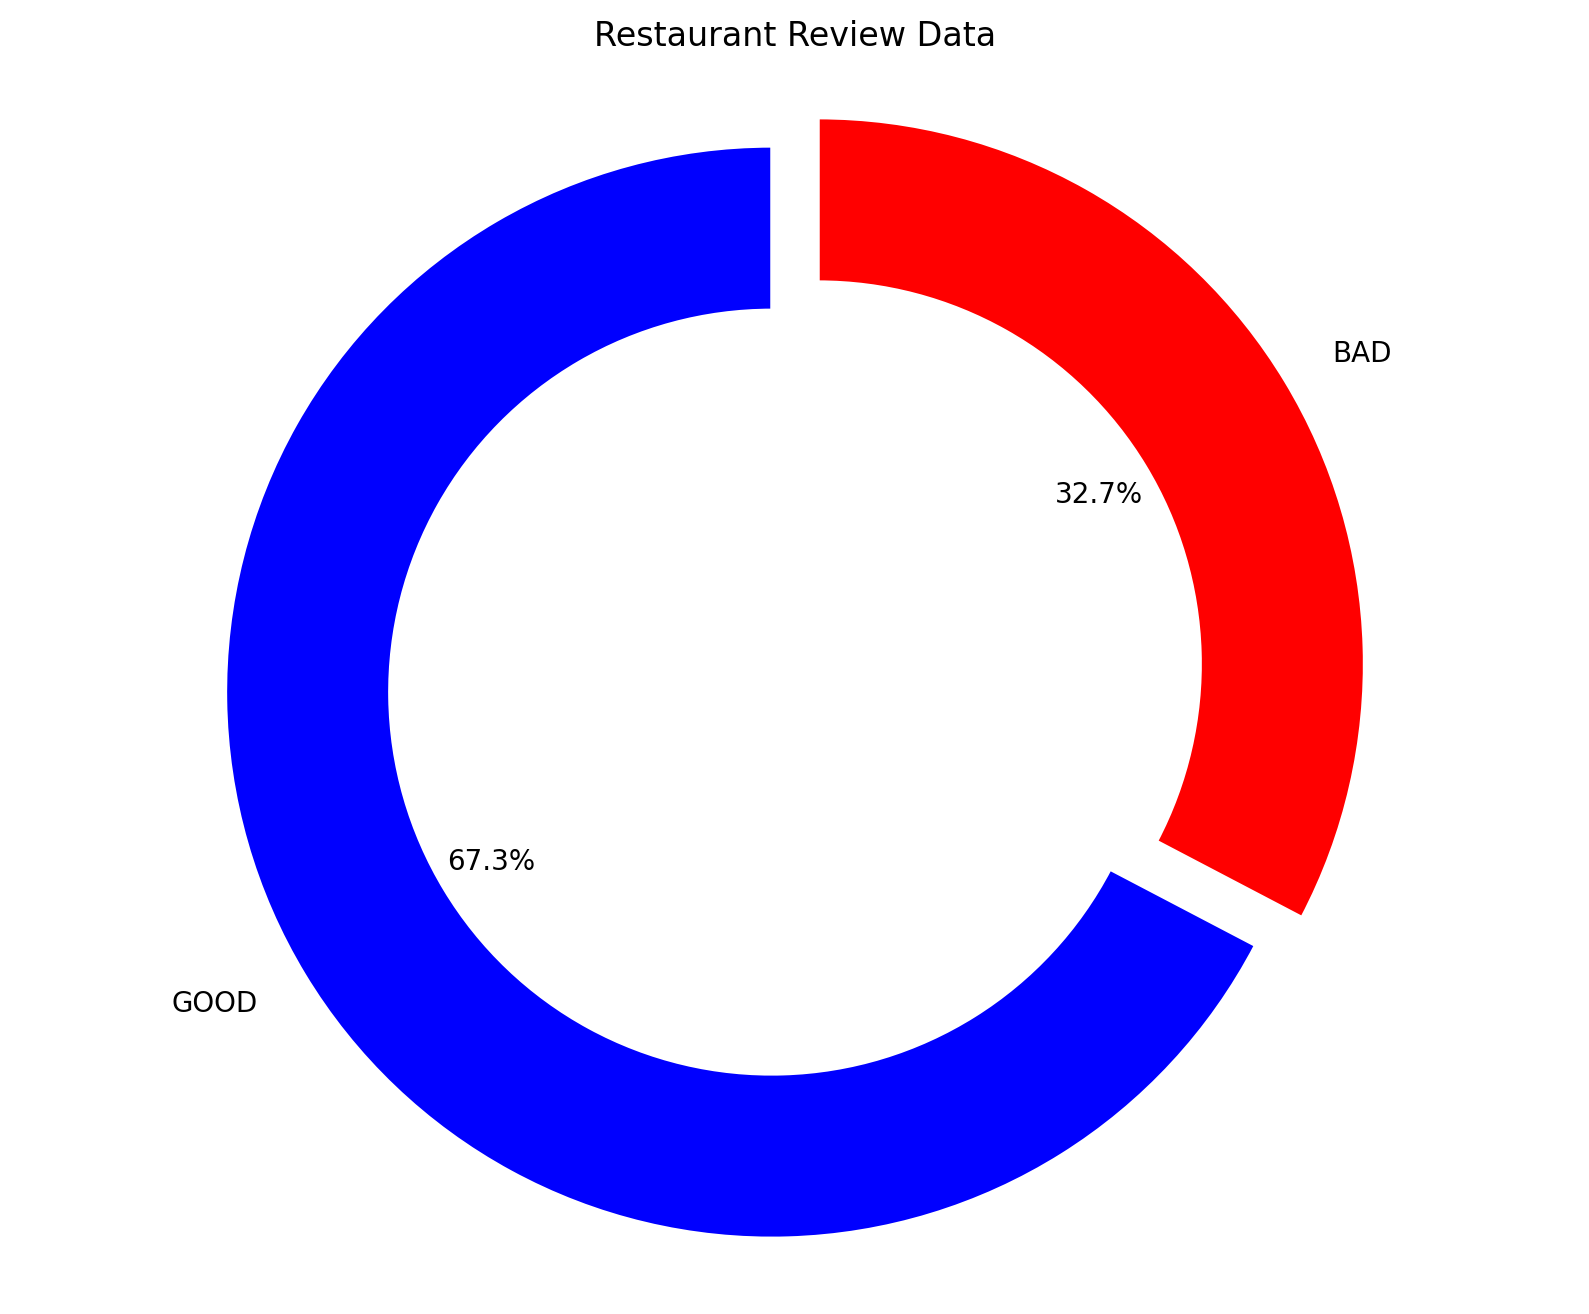

In [52]:
import matplotlib.pyplot as plt

# 데이터 준비
good_count = df['y'].value_counts()[1]
bad_count = df['y'].value_counts()[0]

sizes = [good_count, bad_count]  # 1(맛집)과 0(맛집 아님)의 개수
labels = ['GOOD', 'BAD']
colors = ['blue', 'red']  # 색상 지정
explode = (0.1, 0)  # 첫 번째 조각을 조금 돌출시키기

# 도넛 차트 그리기
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode,
       wedgeprops=dict(width=0.3, edgecolor='w'))  # 중앙 구멍의 크기 조정

# 동그란 모양 유지
ax.axis('equal')

# 제목 추가
plt.title('Restaurant Review Data')

# 표시
plt.show()